- https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M/tree/main
- https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M

In [ ]:
!wget https://huggingface.co/ibm-nasa-geospatial/Prithvi-100M/resolve/main/Prithvi_100M.pt -P ./pretrain/

In [1]:
import tifffile
import cv2
import numpy as np

img = tifffile.imread('../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spring_s2_1_p30.tif')
print(img.shape, img.dtype)

# 13 --> [B02, B03, B04, B05, B06, B07]
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
img_band = np.stack([
    img[:, :, 1], img[:, :, 2], img[:, :, 3], # RGB
    img[:, :, 4], img[:, :, 5], img[:, :, 6],
    ], 
    axis=0) 

img_ts = np.stack([img_band]*3, axis=0)
print(img_ts.shape, img_ts.dtype)

# save as tif
tifffile.imwrite('../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spring_s2_1_p30_resize.tif', img_ts)

(256, 256, 13) uint16
(3, 6, 224, 224) uint16


In [2]:
!python 004_inference.py --data_files ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spring_s2_1_p30_resize.tif ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spring_s2_1_p30_resize.tif ../sample/ROIs1158_spring_s2/s2_1/ROIs1158_spring_s2_1_p30_resize.tif \
    --yaml_file_path ./pretrain/Prithvi_100M_config.yaml --checkpoint ./pretrain/Prithvi_100M.pt \
    --output_dir output/004/ --mask_ratio 0.5

Using cuda device.

/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)

--> Model has 112,639,488 parameters.

Loaded checkpoint from ./pretrain/Prithvi_100M.pt
/opt/conda/lib/python3.8/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(
Done!


(224, 224)


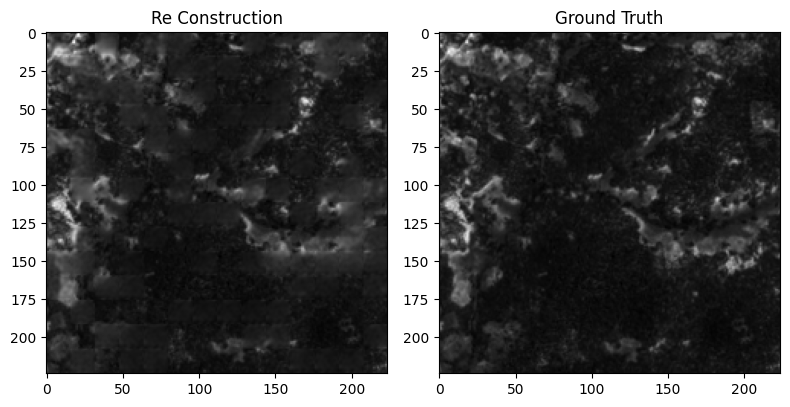

In [5]:
import matplotlib.pyplot as plt
pred_t0 = tifffile.imread('output/004/predicted_t0.tiff')
print(pred_t0.shape)

# plot image
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.title('Re Construction')
plt.imshow(pred_t0, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Ground Truth')
plt.imshow(img_ts[-1][0], cmap='gray')

# off grid
plt.tight_layout()
plt.grid(False)

plt.savefig('output/004/predicted_compare.png', dpi=300)
